In [2]:
## Import Packages
import numpy as np
import _pickle as pk
from matplotlib import pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
mpl.rc('font',size=40,**{'family':'sans-serif','sans-serif':['Arial']})
%matplotlib inline

ModuleNotFoundError: No module named 'netCDF4'

In [1]:
Source = '/Volumes/eSSD0/Papers/GMD_CanESM_p1/'

In [ ]:
#load in cloud feedbacks and dimensions as needed
data_sw = {}
data_lw = {}

data_sw_SR = {}
data_lw_SR = {}

mods = ['CanESM2','CanESM5_p2']
props = ['Standard', 'Amount', 'Altitude', 'Optical Depth', 'Residual', 'Sum']

for i in range(2):
    data_sw[mods[i]] = {}
    data_lw[mods[i]] = {}
    
    data_sw_SR[mods[i]] = pk.load(open(Source+\
        'Data/'+mods[i]+'/CFMIP/Tier_1/'+mods[i]+'_CFMIP_TrCLsw_FB_SRdecomp_Grid.pi','rb'))
    data_lw_SR[mods[i]] = pk.load(open(Source+\
        'Data/'+mods[i]+'/CFMIP/Tier_1/'+mods[i]+'_CFMIP_TrCLlw_FB_SRdecomp_Grid.pi','rb'))
    
    for j in range(len(props)):
        data_sw[mods[i]][props[j]] = pk.load(open(Source+\
    'Data/'+mods[i]+'/CFMIP/Tier_1/'+mods[i]+'_CFMIP_TrCLsw_FB_MZdecomp_Grid.pi','rb'))[props[j]]
        data_lw[mods[i]][props[j]] = pk.load(open(Source+\
    'Data/'+mods[i]+'/CFMIP/Tier_1/'+mods[i]+'_CFMIP_TrCLlw_FB_MZdecomp_Grid.pi','rb'))[props[j]]

lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

In [ ]:
#take the zonal, annual mean
data_lw_SRgam = dict()
data_sw_SRgam = dict()
for mods in data_sw_SR.keys():
    data_sw_SRgam[mods] = dict()
    data_lw_SRgam[mods] = dict()
    
    data_sw_SRgam[mods]['Hi_obs'] = dict()
    data_lw_SRgam[mods]['Hi_obs'] = dict()
    
    data_sw_SRgam[mods]['Hi_cor'] = dict()
    data_lw_SRgam[mods]['Hi_cor'] = dict()
    for prop in data_sw_SR[mods].keys():
        data_sw_SRgam[mods][prop] = dict()
        data_lw_SRgam[mods][prop] = dict()
        
        
        for exp in data_sw_SR[mods][prop].keys():
            data_sw_SRgam[mods][prop][exp] = np.average(np.nanmean(\
            data_sw_SR[mods][prop][exp],axis=0),weights=coslat)
                
            data_lw_SRgam[mods][prop][exp] = np.average(np.nanmean(\
            data_lw_SR[mods][prop][exp],axis=0),weights=coslat)

In [5]:
for mods in data_sw_SR.keys():
    for exp in data_sw_SRgam[mods]['Low'].keys():
        data_sw_SRgam[mods]['Hi_obs'][exp] = \
            data_sw_SRgam[mods]['Low'][exp]-data_sw_SRgam[mods]['Low_unobscured'][exp]
        data_lw_SRgam[mods]['Hi_obs'][exp] = \
            data_lw_SRgam[mods]['Low'][exp]-data_lw_SRgam[mods]['Low_unobscured'][exp]
        
        data_sw_SRgam[mods]['Hi_cor'][exp] = \
            data_sw_SRgam[mods]['Hi_obs'][exp]+data_sw_SRgam[mods]['Hi'][exp]
        data_lw_SRgam[mods]['Hi_cor'][exp] = \
            data_lw_SRgam[mods]['Hi_obs'][exp]+data_lw_SRgam[mods]['Hi'][exp]
print(data_sw_SRgam['CanESM2'].keys())

dict_keys(['Hi_obs', 'Hi_cor', 'Low', 'Low_unobscured', 'Hi'])


In [6]:
#take the zonal, annual mean
data_lw_gam = dict()
data_sw_gam = dict()
for mods in data_sw.keys():
    data_sw_gam[mods] = dict()
    data_lw_gam[mods] = dict()
    
    for prop in data_sw[mods].keys():
        data_sw_gam[mods][prop] = dict()
        data_lw_gam[mods][prop] = dict()
        
        for exp in data_sw[mods][prop].keys():
            data_sw_gam[mods][prop][exp] = dict()
            data_lw_gam[mods][prop][exp] = dict()
            
            for ctp in data_sw[mods][prop][exp].keys():
                data_sw_gam[mods][prop][exp][ctp] = np.average(np.nanmean(\
                data_sw[mods][prop][exp][ctp],axis=0),weights=coslat)
                
                data_lw_gam[mods][prop][exp][ctp] = np.average(np.nanmean(\
                data_lw[mods][prop][exp][ctp],axis=0),weights=coslat)

In [7]:
for mods in data_sw_SRgam.keys():
    print(mods)
    for height in data_sw_SRgam[mods].keys():
        if height == 'Low' or height == 'Hi' or height == 'Hi_obs':
            pass
        else:
            print(height, '\n')
            print('SW - ',round(data_sw_SRgam[mods][height]['amip-future4K'],2))
            print('LW - ',round(data_lw_SRgam[mods][height]['amip-future4K'],2))
            print('\n')

CanESM2
Hi_cor 

SW -  -0.58
LW -  0.87


Low_unobscured 

SW -  0.32
LW -  0.01


CanESM5_p2
Hi_cor 

SW -  -0.34
LW -  0.7


Low_unobscured 

SW -  0.47
LW -  -0.04




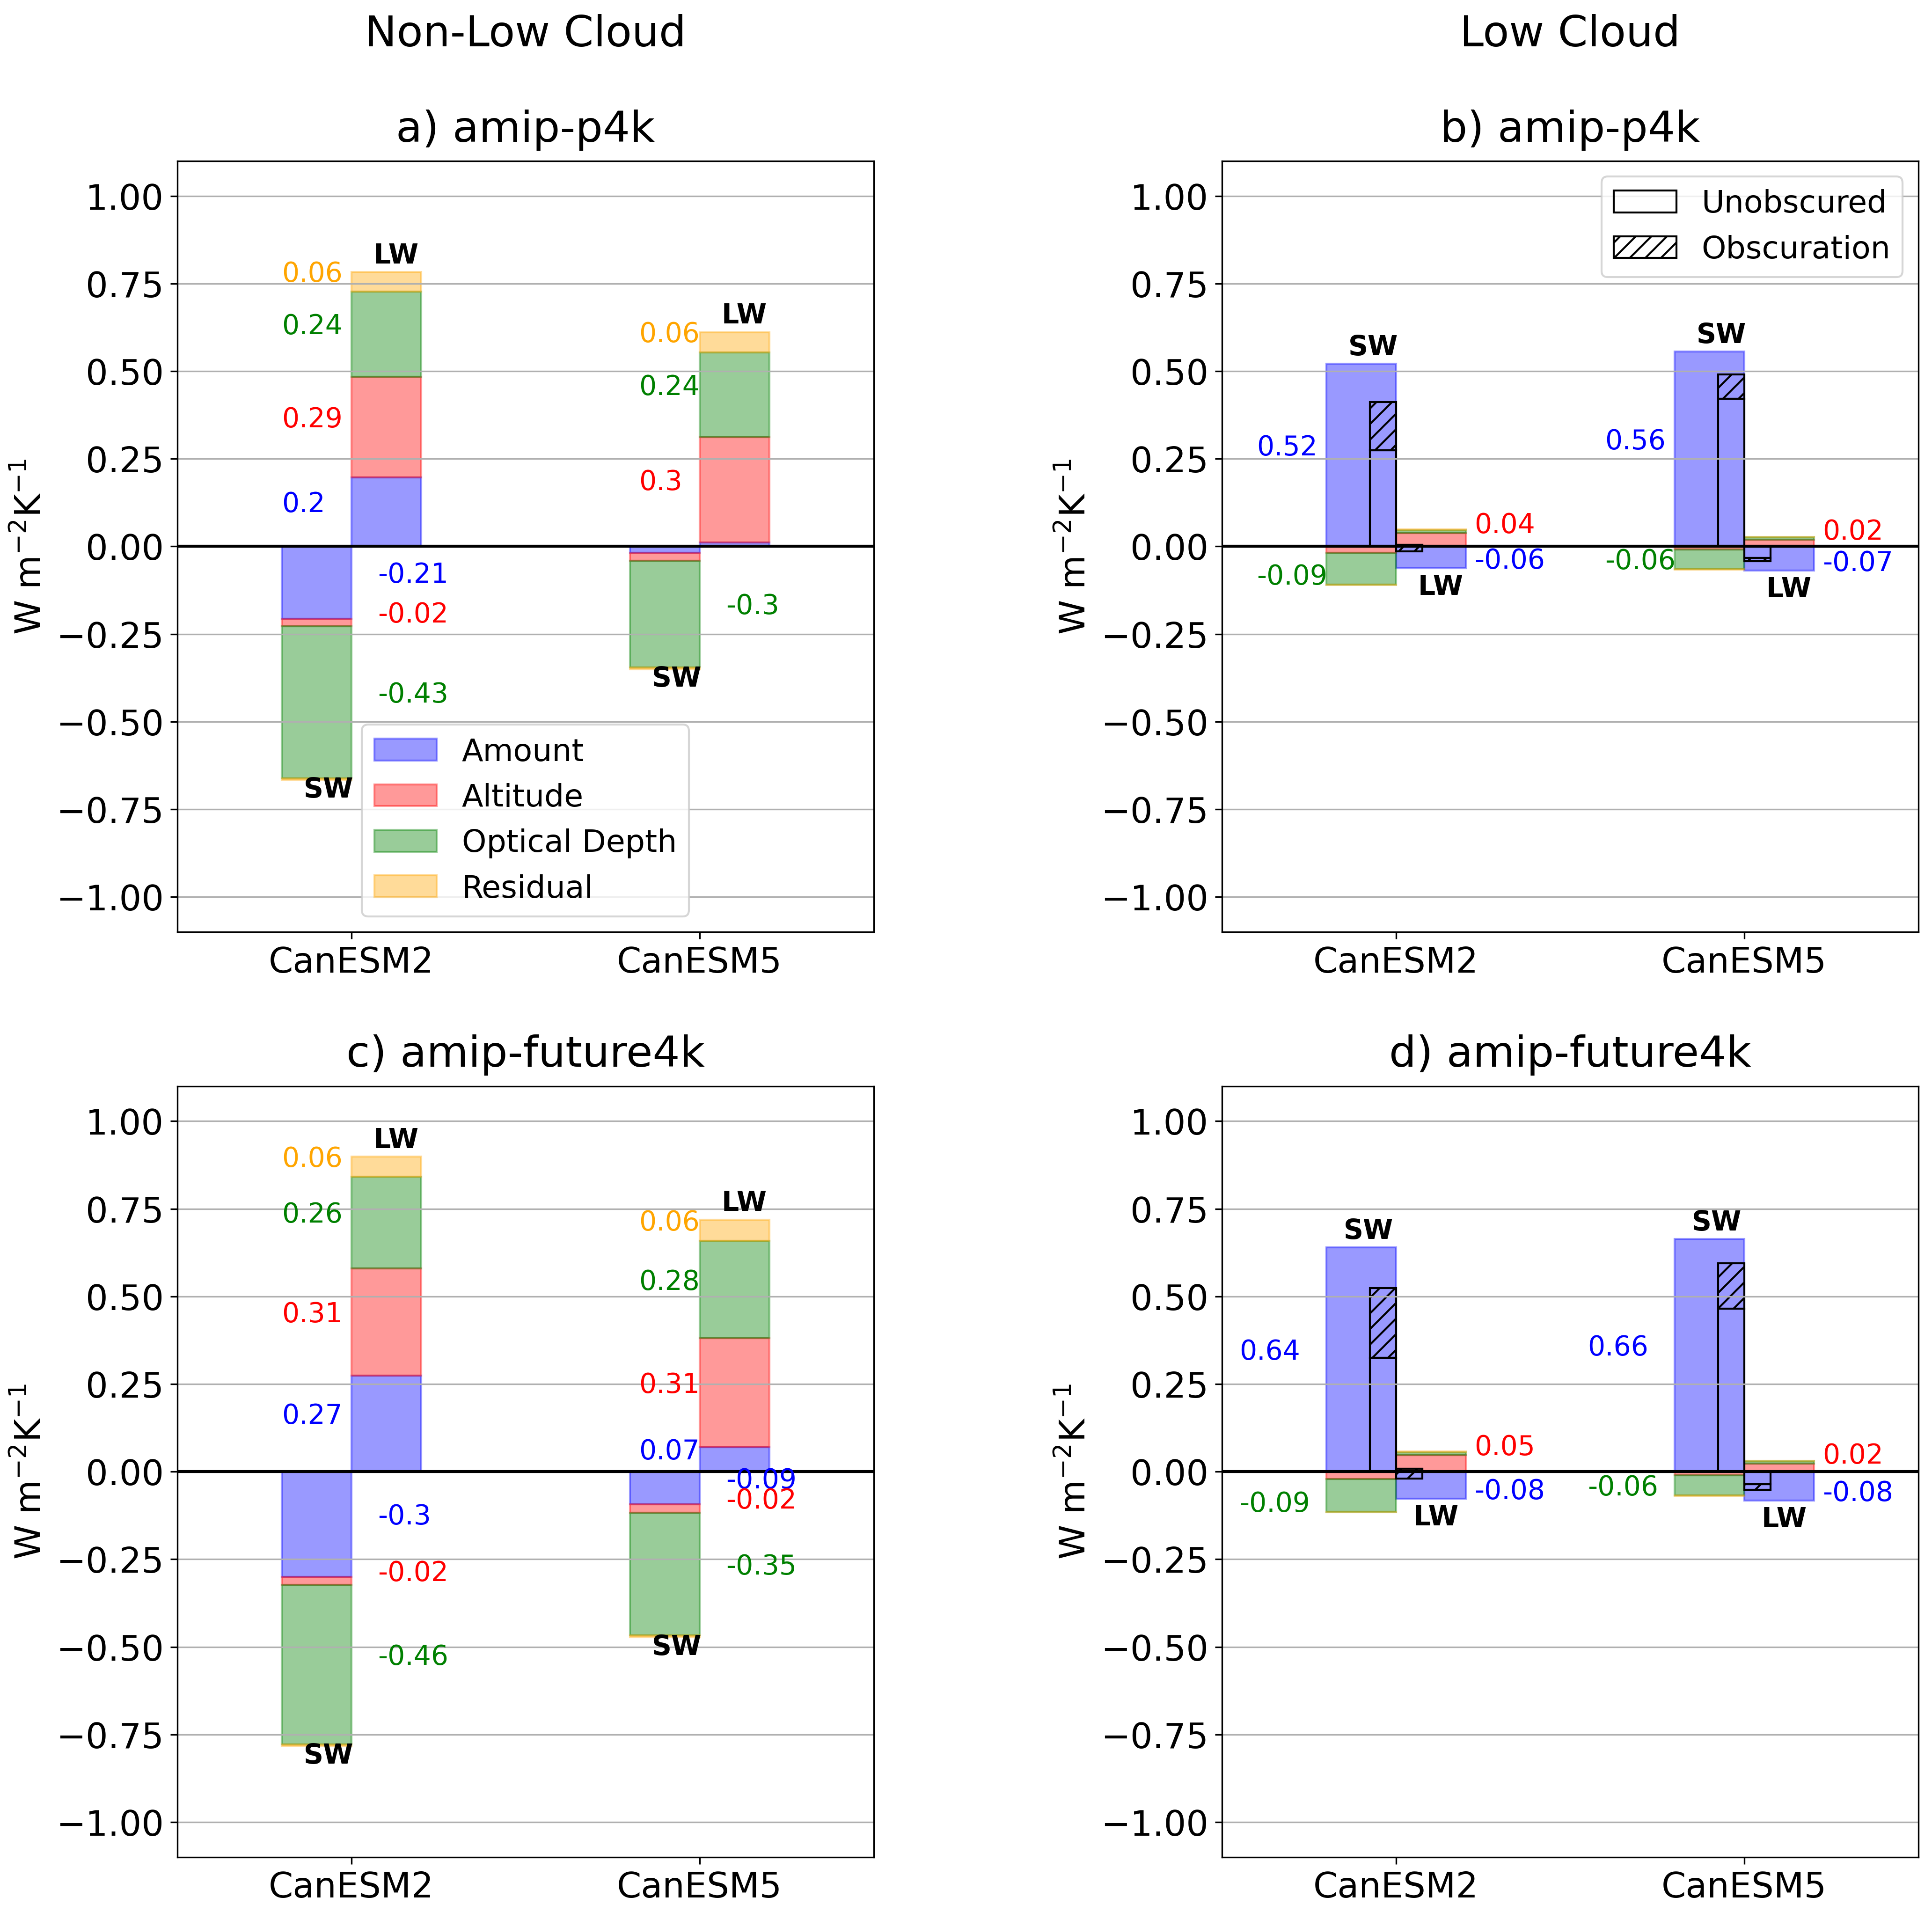

In [32]:
plt.figure(figsize=(16,16),dpi=300)
plt.subplot(221)
#plt.gca().spines['bottom'].set_position(('data',0))
#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)
plt.title('Non-Low Cloud\n\na) amip-p4k',fontsize=22,pad=10)

#CanESM2
#amount
plt.bar(1,data_lw_gam['CanESM2']['Amount']['Uniform']['Hi'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue',label='Amount')
plt.text(0.6,data_lw_gam['CanESM2']['Amount']['Uniform']['Hi']/2,\
         str(round(data_lw_gam['CanESM2']['Amount']['Uniform']['Hi'],2)),color='blue',fontsize=14)
plt.bar(1,data_sw_gam['CanESM2']['Amount']['Uniform']['Hi'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(1.15,data_sw_gam['CanESM2']['Amount']['Uniform']['Hi']/2,\
         str(round(data_sw_gam['CanESM2']['Amount']['Uniform']['Hi'],2)),color='blue',fontsize=14)

#altitude
plt.bar(1,data_lw_gam['CanESM2']['Altitude']['Uniform']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM2']['Amount']['Uniform']['Hi'],\
        color='red',alpha=0.4,edgecolor='red',label='Altitude')
plt.text(0.6,data_lw_gam['CanESM2']['Amount']['Uniform']['Hi']+(data_lw_gam['CanESM2']['Altitude']['Uniform']['Hi']/2),\
         str(round(data_lw_gam['CanESM2']['Altitude']['Uniform']['Hi'],2)),color='red',fontsize=14)
plt.bar(1,data_sw_gam['CanESM2']['Altitude']['Uniform']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM2']['Amount']['Uniform']['Hi'],\
        color='red',alpha=0.4,edgecolor='red')
plt.text(1.15,data_sw_gam['CanESM2']['Amount']['Uniform']['Hi']+(data_sw_gam['CanESM2']['Altitude']['Uniform']['Hi']/2),\
         str(round(data_sw_gam['CanESM2']['Altitude']['Uniform']['Hi'],2)),color='red',fontsize=14)

#optical depth
plt.bar(1,data_lw_gam['CanESM2']['Optical Depth']['Uniform']['Hi'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['CanESM2']['Altitude']['Uniform']['Hi']+data_lw_gam['CanESM2']['Amount']['Uniform']['Hi'],\
        color='green',alpha=0.4,edgecolor='green',label='Optical Depth')
plt.text(0.6,data_lw_gam['CanESM2']['Amount']['Uniform']['Hi']+data_lw_gam['CanESM2']['Altitude']['Uniform']['Hi']+\
         (data_lw_gam['CanESM2']['Optical Depth']['Uniform']['Hi']/2),\
         str(round(data_lw_gam['CanESM2']['Optical Depth']['Uniform']['Hi'],2)),color='green',fontsize=14)
plt.bar(1,data_sw_gam['CanESM2']['Optical Depth']['Uniform']['Hi'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['CanESM2']['Altitude']['Uniform']['Hi']+data_sw_gam['CanESM2']['Amount']['Uniform']['Hi'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(1.15,data_sw_gam['CanESM2']['Amount']['Uniform']['Hi']+data_sw_gam['CanESM2']['Altitude']['Uniform']['Hi']+\
         (data_sw_gam['CanESM2']['Optical Depth']['Uniform']['Hi']/2),\
         str(round(data_sw_gam['CanESM2']['Optical Depth']['Uniform']['Hi'],2)),color='green',fontsize=14)

#Residual
plt.bar(1,data_lw_gam['CanESM2']['Residual']['Uniform']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM2']['Altitude']['Uniform']['Hi']+\
        data_lw_gam['CanESM2']['Amount']['Uniform']['Hi']+data_lw_gam['CanESM2']['Optical Depth']['Uniform']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange',label='Residual')
plt.text(0.6,data_lw_gam['CanESM2']['Amount']['Uniform']['Hi']+data_lw_gam['CanESM2']['Altitude']['Uniform']['Hi']+\
         data_lw_gam['CanESM2']['Optical Depth']['Uniform']['Hi']+\
         (data_lw_gam['CanESM2']['Residual']['Uniform']['Hi']/2),\
         str(round(data_lw_gam['CanESM2']['Residual']['Uniform']['Hi'],2)),color='orange',fontsize=14)
plt.bar(1,data_sw_gam['CanESM2']['Residual']['Uniform']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM2']['Altitude']['Uniform']['Hi']+\
        data_sw_gam['CanESM2']['Amount']['Uniform']['Hi']+data_sw_gam['CanESM2']['Optical Depth']['Uniform']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange')

#CanESM5
#amount
plt.bar(3,data_lw_gam['CanESM5_p2']['Amount']['Uniform']['Hi'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
#plt.text(2.65,data_lw_gam['CanESM5_p2']['Amount']['Uniform']['Hi']/2,\
#         str(round(data_lw_gam['CanESM5_p2']['Amount']['Uniform']['Hi'],2)),color='blue')
plt.bar(3,data_sw_gam['CanESM5_p2']['Amount']['Uniform']['Hi'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
#plt.text(3.15,data_sw_gam['CanESM5_p2']['Amount']['Uniform']['Hi']/2,\
#         str(round(data_sw_gam['CanESM5_p2']['Amount']['Uniform']['Hi'],2)),color='blue')

#altitude
plt.bar(3,data_lw_gam['CanESM5_p2']['Altitude']['Uniform']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM5_p2']['Amount']['Uniform']['Hi'],\
        color='red',alpha=0.4,edgecolor='red')
plt.text(2.65,data_lw_gam['CanESM5_p2']['Amount']['Uniform']['Hi']+(data_lw_gam['CanESM5_p2']['Altitude']['Uniform']['Hi']/2),\
         str(round(data_lw_gam['CanESM5_p2']['Altitude']['Uniform']['Hi'],2)),color='red',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Altitude']['Uniform']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM5_p2']['Amount']['Uniform']['Hi'],\
        color='red',alpha=0.4,edgecolor='red')
#plt.text(3.15,data_sw_gam['CanESM5_p2']['Amount']['Uniform']['Hi']+(data_sw_gam['CanESM5_p2']['Altitude']['Uniform']['Hi']/2),\
#         str(round(data_sw_gam['CanESM5_p2']['Altitude']['Uniform']['Hi'],2)),color='red')

#optical depth
plt.bar(3,data_lw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Hi'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['CanESM5_p2']['Altitude']['Uniform']['Hi']+data_lw_gam['CanESM5_p2']['Amount']['Uniform']['Hi'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(2.65,data_lw_gam['CanESM5_p2']['Amount']['Uniform']['Hi']+data_lw_gam['CanESM5_p2']['Altitude']['Uniform']['Hi']+\
         (data_lw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Hi']/2),\
         str(round(data_lw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Hi'],2)),color='green',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Hi'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['CanESM5_p2']['Altitude']['Uniform']['Hi']+data_sw_gam['CanESM5_p2']['Amount']['Uniform']['Hi'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(3.15,data_sw_gam['CanESM5_p2']['Amount']['Uniform']['Hi']+data_sw_gam['CanESM5_p2']['Altitude']['Uniform']['Hi']+\
         (data_sw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Hi']/2),\
         str(round(data_sw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Hi'],2)),color='green',fontsize=14)

#Residual
plt.bar(3,data_lw_gam['CanESM5_p2']['Residual']['Uniform']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM5_p2']['Altitude']['Uniform']['Hi']+\
        data_lw_gam['CanESM5_p2']['Amount']['Uniform']['Hi']+data_lw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange')
plt.text(2.65,data_lw_gam['CanESM5_p2']['Amount']['Uniform']['Hi']+data_lw_gam['CanESM5_p2']['Altitude']['Uniform']['Hi']+\
         data_lw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Hi']+\
         (data_lw_gam['CanESM5_p2']['Residual']['Uniform']['Hi']/2),\
         str(round(data_lw_gam['CanESM5_p2']['Residual']['Uniform']['Hi'],2)),color='orange',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Residual']['Uniform']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM5_p2']['Altitude']['Uniform']['Hi']+\
        data_sw_gam['CanESM5_p2']['Amount']['Uniform']['Hi']+data_sw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange')
#plt.text(3.01,data_sw_gam['CanESM5_p2']['Amount']['Uniform']['Hi']+data_sw_gam['CanESM5_p2']['Altitude']['Uniform']['Hi']+\
#         data_sw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Hi']+\
#         (data_sw_gam['CanESM5_p2']['Residual']['Uniform']['Hi']/2),\
#         str(round(data_sw_gam['CanESM5_p2']['Residual']['Uniform']['Hi'],2)),color='orange')

plt.xlim(0,4)
plt.xticks([1,3],labels=['CanESM2','CanESM5'],fontsize=18)
plt.grid(axis='y')
plt.axhline(0,color='k')
plt.ylabel('W m$^{-2}$K$^{-1}$',fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(-1.1,1.1);
plt.legend(loc='lower center',fontsize=16)


plt.text(0.725,data_sw_gam['CanESM2']['Sum']['Uniform']['Hi']-0.05,'SW',color='k',fontweight='bold',fontsize=14)
plt.text(1.125,data_lw_gam['CanESM2']['Sum']['Uniform']['Hi']+0.025,'LW',color='k',fontweight='bold',fontsize=14)

plt.text(2.725,data_sw_gam['CanESM5_p2']['Sum']['Uniform']['Hi']-0.05,'SW',color='k',fontweight='bold',fontsize=14)
plt.text(3.125,data_lw_gam['CanESM5_p2']['Sum']['Uniform']['Hi']+0.025,'LW',color='k',fontweight='bold',fontsize=14)
#------------
#SHORTWAVE
#------------
plt.subplot(222)
#plt.gca().spines['bottom'].set_position(('data',0))
#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)
plt.title('Low Cloud\n\nb) amip-p4k',fontsize=22,pad=10)

#CanESM2
#amount
plt.bar(1,data_lw_gam['CanESM2']['Amount']['Uniform']['Low'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(1.45,data_lw_gam['CanESM2']['Amount']['Uniform']['Low'],\
         str(round(data_lw_gam['CanESM2']['Amount']['Uniform']['Low'],2)),color='blue',fontsize=14)
plt.bar(1,data_sw_gam['CanESM2']['Amount']['Uniform']['Low'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(0.2,data_sw_gam['CanESM2']['Amount']['Uniform']['Low']/2,\
         str(round(data_sw_gam['CanESM2']['Amount']['Uniform']['Low'],2)),color='blue',fontsize=14)

#altitude
plt.bar(1,data_lw_gam['CanESM2']['Altitude']['Uniform']['Low'],align='edge',width=0.4,\
        color='red',alpha=0.4,edgecolor='red')
plt.text(1.45,data_lw_gam['CanESM2']['Altitude']['Uniform']['Low'],\
         str(round(data_lw_gam['CanESM2']['Altitude']['Uniform']['Low'],2)),color='red',fontsize=14)
plt.bar(1,data_sw_gam['CanESM2']['Altitude']['Uniform']['Low'],align='edge',width=-0.4,\
        color='red',alpha=0.4,edgecolor='red')
#plt.text(0.2,-0.04,\
#         str(round(data_sw_gam['CanESM2']['Altitude']['Uniform']['Low']/2,2)),color='red')

#optical depth
plt.bar(1,data_lw_gam['CanESM2']['Optical Depth']['Uniform']['Low'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['CanESM2']['Altitude']['Uniform']['Low'],\
        color='green',alpha=0.4,edgecolor='green')
#plt.text(1.45,0.07,\
#         str(round(data_lw_gam['CanESM2']['Optical Depth']['Uniform']['Low'],2)),color='green')
plt.bar(1,data_sw_gam['CanESM2']['Optical Depth']['Uniform']['Low'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['CanESM2']['Altitude']['Uniform']['Low'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(0.2,data_sw_gam['CanESM2']['Altitude']['Uniform']['Low']+\
         (data_sw_gam['CanESM2']['Optical Depth']['Uniform']['Low']),\
         str(round(data_sw_gam['CanESM2']['Optical Depth']['Uniform']['Low'],2)),color='green',fontsize=14)

#Residual
plt.bar(1,data_lw_gam['CanESM2']['Residual']['Uniform']['Low'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM2']['Altitude']['Uniform']['Low']+\
        data_lw_gam['CanESM2']['Optical Depth']['Uniform']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange')
#plt.text(1.45,0.12,\
#         str(round(data_lw_gam['CanESM2']['Residual']['Uniform']['Low'],2)),color='orange')
plt.bar(1,data_sw_gam['CanESM2']['Residual']['Uniform']['Low'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM2']['Altitude']['Uniform']['Low']+\
        data_sw_gam['CanESM2']['Optical Depth']['Uniform']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange')

#CanESM5
#amount
plt.bar(3,data_lw_gam['CanESM5_p2']['Amount']['Uniform']['Low'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(3.45,data_lw_gam['CanESM5_p2']['Amount']['Uniform']['Low'],\
         str(round(data_lw_gam['CanESM5_p2']['Amount']['Uniform']['Low'],2)),color='blue',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Amount']['Uniform']['Low'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(2.2,data_sw_gam['CanESM5_p2']['Amount']['Uniform']['Low']/2,\
         str(round(data_sw_gam['CanESM5_p2']['Amount']['Uniform']['Low'],2)),color='blue',fontsize=14)

#altitude
plt.bar(3,data_lw_gam['CanESM5_p2']['Altitude']['Uniform']['Low'],align='edge',width=0.4,\
        color='red',alpha=0.4,edgecolor='red')
plt.text(3.45,data_lw_gam['CanESM5_p2']['Altitude']['Uniform']['Low'],\
         str(round(data_lw_gam['CanESM5_p2']['Altitude']['Uniform']['Low'],2)),color='red',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Altitude']['Uniform']['Low'],align='edge',width=-0.4,\
        color='red',alpha=0.4,edgecolor='red')
#plt.text(2.2,-0.04,\
#         str(round(data_sw_gam['CanESM5_p2']['Altitude']['Uniform']['Low']/2,2)),color='red')

#optical depth
plt.bar(3,data_lw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Low'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['CanESM5_p2']['Altitude']['Uniform']['Low'],\
        color='green',alpha=0.4,edgecolor='green')
#plt.text(3.45,0.07,\
#         str(round(data_lw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Low'],2)),color='green')
plt.bar(3,data_sw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Low'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['CanESM5_p2']['Altitude']['Uniform']['Low'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(2.2,data_sw_gam['CanESM5_p2']['Altitude']['Uniform']['Low']+\
         (data_sw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Low']),\
         str(round(data_sw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Low'],2)),color='green',fontsize=14)

#Residual
plt.bar(3,data_lw_gam['CanESM5_p2']['Residual']['Uniform']['Low'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM5_p2']['Altitude']['Uniform']['Low']+\
        data_lw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange')
#plt.text(3.45,0.12,\
#         str(round(data_lw_gam['CanESM5_p2']['Residual']['Uniform']['Low'],2)),color='orange')
plt.bar(3,data_sw_gam['CanESM5_p2']['Residual']['Uniform']['Low'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM5_p2']['Altitude']['Uniform']['Low']+\
        data_sw_gam['CanESM5_p2']['Optical Depth']['Uniform']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange')
#plt.text(3.35,-0.13,\
#         str(round(data_sw_gam['CanESM5_p2']['Residual']['Uniform']['Low'],2)),color='orange')


#OBSCURATION PLOTS
plt.bar(3,data_sw_SRgam['CanESM5_p2']['Low_unobscured']['amip-p4K'],align='edge',width=-0.15,\
        color='None',edgecolor='k')
plt.bar(3,data_sw_SRgam['CanESM5_p2']['Hi_obs']['amip-p4K'],align='edge',width=-0.15,hatch='///',\
        bottom=data_sw_SRgam['CanESM5_p2']['Low_unobscured']['amip-p4K'],color='None',edgecolor='k')

plt.bar(1,data_sw_SRgam['CanESM2']['Low_unobscured']['amip-p4K'],align='edge',width=-0.15,\
        color='None',edgecolor='k')
plt.bar(1,data_sw_SRgam['CanESM2']['Hi_obs']['amip-p4K'],align='edge',width=-0.15,hatch='///',\
        bottom=data_sw_SRgam['CanESM2']['Low_unobscured']['amip-p4K'],color='None',edgecolor='k')

plt.bar(3,data_lw_SRgam['CanESM5_p2']['Low_unobscured']['amip-p4K'],align='edge',width=0.15,\
        color='None',edgecolor='k')
plt.bar(3,data_lw_SRgam['CanESM5_p2']['Hi_obs']['amip-p4K'],align='edge',width=0.15,hatch='///',\
        bottom=data_lw_SRgam['CanESM5_p2']['Low_unobscured']['amip-p4K'],color='None',edgecolor='k')

plt.bar(1,data_lw_SRgam['CanESM2']['Low_unobscured']['amip-p4K'],align='edge',width=0.15,\
        color='None',edgecolor='k',label='Unobscured')
plt.bar(1,data_lw_SRgam['CanESM2']['Hi_obs']['amip-p4K'],align='edge',width=0.15,hatch='///',\
        bottom=data_lw_SRgam['CanESM2']['Low_unobscured']['amip-p4K'],color='None',edgecolor='k',\
        label='Obscuration')

plt.xlim(0,4)
plt.xticks([1,3],labels=['CanESM2','CanESM5'],fontsize=18)
plt.legend(fontsize=16)
plt.yticks(fontsize=18)
plt.ylabel('W m$^{-2}$K$^{-1}$',fontsize=18)
plt.ylim(-1.1,1.1)
plt.axhline(0,color='k')

plt.text(0.725,data_sw_gam['CanESM2']['Amount']['Uniform']['Low']+0.025,'SW',color='k',fontweight='bold',fontsize=14)
plt.text(1.125,data_lw_gam['CanESM2']['Amount']['Uniform']['Low']-0.075,'LW',color='k',fontweight='bold',fontsize=14)

plt.text(2.725,data_sw_gam['CanESM5_p2']['Amount']['Uniform']['Low']+0.025,'SW',color='k',fontweight='bold',fontsize=14)
plt.text(3.125,data_lw_gam['CanESM5_p2']['Amount']['Uniform']['Low']-0.075,'LW',color='k',fontweight='bold',fontsize=14);
plt.grid(axis='y')

plt.subplot(223)
#plt.gca().spines['bottom'].set_position(('data',0))
#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)
plt.title('c) amip-future4k',fontsize=22,pad=10)

#CanESM2
#amount
plt.bar(1,data_lw_gam['CanESM2']['Amount']['Pattern']['Hi'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue',label='Amount')
plt.text(0.6,data_lw_gam['CanESM2']['Amount']['Pattern']['Hi']/2,\
         str(round(data_lw_gam['CanESM2']['Amount']['Pattern']['Hi'],2)),color='blue',fontsize=14)
plt.bar(1,data_sw_gam['CanESM2']['Amount']['Pattern']['Hi'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(1.15,data_sw_gam['CanESM2']['Amount']['Pattern']['Hi']/2,\
         str(round(data_sw_gam['CanESM2']['Amount']['Pattern']['Hi'],2)),color='blue',fontsize=14)

#altitude
plt.bar(1,data_lw_gam['CanESM2']['Altitude']['Pattern']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM2']['Amount']['Pattern']['Hi'],\
        color='red',alpha=0.4,edgecolor='red',label='Altitude')
plt.text(0.6,data_lw_gam['CanESM2']['Amount']['Pattern']['Hi']+(data_lw_gam['CanESM2']['Altitude']['Pattern']['Hi']/2),\
         str(round(data_lw_gam['CanESM2']['Altitude']['Pattern']['Hi'],2)),color='red',fontsize=14)
plt.bar(1,data_sw_gam['CanESM2']['Altitude']['Pattern']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM2']['Amount']['Pattern']['Hi'],\
        color='red',alpha=0.4,edgecolor='red')
plt.text(1.15,data_sw_gam['CanESM2']['Amount']['Pattern']['Hi']+(data_sw_gam['CanESM2']['Altitude']['Pattern']['Hi']/2),\
         str(round(data_sw_gam['CanESM2']['Altitude']['Pattern']['Hi'],2)),color='red',fontsize=14)

#optical depth
plt.bar(1,data_lw_gam['CanESM2']['Optical Depth']['Pattern']['Hi'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['CanESM2']['Altitude']['Pattern']['Hi']+data_lw_gam['CanESM2']['Amount']['Pattern']['Hi'],\
        color='green',alpha=0.4,edgecolor='green',label='Optical Depth')
plt.text(0.6,data_lw_gam['CanESM2']['Amount']['Pattern']['Hi']+data_lw_gam['CanESM2']['Altitude']['Pattern']['Hi']+\
         (data_lw_gam['CanESM2']['Optical Depth']['Pattern']['Hi']/2),\
         str(round(data_lw_gam['CanESM2']['Optical Depth']['Pattern']['Hi'],2)),color='green',fontsize=14)
plt.bar(1,data_sw_gam['CanESM2']['Optical Depth']['Pattern']['Hi'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['CanESM2']['Altitude']['Pattern']['Hi']+data_sw_gam['CanESM2']['Amount']['Pattern']['Hi'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(1.15,data_sw_gam['CanESM2']['Amount']['Pattern']['Hi']+data_sw_gam['CanESM2']['Altitude']['Pattern']['Hi']+\
         (data_sw_gam['CanESM2']['Optical Depth']['Pattern']['Hi']/2),\
         str(round(data_sw_gam['CanESM2']['Optical Depth']['Pattern']['Hi'],2)),color='green',fontsize=14)

#Residual
plt.bar(1,data_lw_gam['CanESM2']['Residual']['Pattern']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM2']['Altitude']['Pattern']['Hi']+\
        data_lw_gam['CanESM2']['Amount']['Pattern']['Hi']+data_lw_gam['CanESM2']['Optical Depth']['Pattern']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange',label='Residual')
plt.text(0.6,data_lw_gam['CanESM2']['Amount']['Pattern']['Hi']+data_lw_gam['CanESM2']['Altitude']['Pattern']['Hi']+\
         data_lw_gam['CanESM2']['Optical Depth']['Pattern']['Hi']+\
         (data_lw_gam['CanESM2']['Residual']['Pattern']['Hi']/2),\
         str(round(data_lw_gam['CanESM2']['Residual']['Pattern']['Hi'],2)),color='orange',fontsize=14)
plt.bar(1,data_sw_gam['CanESM2']['Residual']['Pattern']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM2']['Altitude']['Pattern']['Hi']+\
        data_sw_gam['CanESM2']['Amount']['Pattern']['Hi']+data_sw_gam['CanESM2']['Optical Depth']['Pattern']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange')

#CanESM5
#amount
plt.bar(3,data_lw_gam['CanESM5_p2']['Amount']['Pattern']['Hi'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(2.65,data_lw_gam['CanESM5_p2']['Amount']['Pattern']['Hi']/2,\
         str(round(data_lw_gam['CanESM5_p2']['Amount']['Pattern']['Hi'],2)),color='blue',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Amount']['Pattern']['Hi'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(3.15,data_sw_gam['CanESM5_p2']['Amount']['Pattern']['Hi']/2,\
         str(round(data_sw_gam['CanESM5_p2']['Amount']['Pattern']['Hi'],2)),color='blue',fontsize=14)

#altitude
plt.bar(3,data_lw_gam['CanESM5_p2']['Altitude']['Pattern']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM5_p2']['Amount']['Pattern']['Hi'],\
        color='red',alpha=0.4,edgecolor='red')
plt.text(2.65,data_lw_gam['CanESM5_p2']['Amount']['Pattern']['Hi']+(data_lw_gam['CanESM5_p2']['Altitude']['Pattern']['Hi']/2),\
         str(round(data_lw_gam['CanESM5_p2']['Altitude']['Pattern']['Hi'],2)),color='red',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Altitude']['Pattern']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM5_p2']['Amount']['Pattern']['Hi'],\
        color='red',alpha=0.4,edgecolor='red')
plt.text(3.15,data_sw_gam['CanESM5_p2']['Amount']['Pattern']['Hi']+(data_sw_gam['CanESM5_p2']['Altitude']['Pattern']['Hi']/2),\
         str(round(data_sw_gam['CanESM5_p2']['Altitude']['Pattern']['Hi'],2)),color='red',fontsize=14)

#optical depth
plt.bar(3,data_lw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Hi'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['CanESM5_p2']['Altitude']['Pattern']['Hi']+data_lw_gam['CanESM5_p2']['Amount']['Pattern']['Hi'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(2.65,data_lw_gam['CanESM5_p2']['Amount']['Pattern']['Hi']+data_lw_gam['CanESM5_p2']['Altitude']['Pattern']['Hi']+\
         (data_lw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Hi']/2),\
         str(round(data_lw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Hi'],2)),color='green',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Hi'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['CanESM5_p2']['Altitude']['Pattern']['Hi']+data_sw_gam['CanESM5_p2']['Amount']['Pattern']['Hi'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(3.15,data_sw_gam['CanESM5_p2']['Amount']['Pattern']['Hi']+data_sw_gam['CanESM5_p2']['Altitude']['Pattern']['Hi']+\
         (data_sw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Hi']/2),\
         str(round(data_sw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Hi'],2)),color='green',fontsize=14)

#Residual
plt.bar(3,data_lw_gam['CanESM5_p2']['Residual']['Pattern']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM5_p2']['Altitude']['Pattern']['Hi']+\
        data_lw_gam['CanESM5_p2']['Amount']['Pattern']['Hi']+data_lw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange')
plt.text(2.65,data_lw_gam['CanESM5_p2']['Amount']['Pattern']['Hi']+data_lw_gam['CanESM5_p2']['Altitude']['Pattern']['Hi']+\
         data_lw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Hi']+\
         (data_lw_gam['CanESM5_p2']['Residual']['Pattern']['Hi']/2),\
         str(round(data_lw_gam['CanESM5_p2']['Residual']['Pattern']['Hi'],2)),color='orange',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Residual']['Pattern']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM5_p2']['Altitude']['Pattern']['Hi']+\
        data_sw_gam['CanESM5_p2']['Amount']['Pattern']['Hi']+data_sw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange')
#plt.text(3.01,data_sw_gam['CanESM5_p2']['Amount']['Pattern']['Hi']+data_sw_gam['CanESM5_p2']['Altitude']['Pattern']['Hi']+\
#         data_sw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Hi']+\
#         (data_sw_gam['CanESM5_p2']['Residual']['Pattern']['Hi']/2),\
#         str(round(data_sw_gam['CanESM5_p2']['Residual']['Pattern']['Hi'],2)),color='orange')


plt.xlim(0,4)
plt.xticks([1,3],labels=['CanESM2','CanESM5'],fontsize=18)
plt.axhline(0,color='k')
plt.ylabel('W m$^{-2}$K$^{-1}$',fontsize=18)
plt.grid(axis='y')
plt.ylim(-1.1,1.1)
plt.yticks(fontsize=18)
#plt.legend(loc='lower center')

plt.text(0.725,data_sw_gam['CanESM2']['Sum']['Pattern']['Hi']-0.05,'SW',color='k',fontweight='bold',fontsize=14)
plt.text(1.125,data_lw_gam['CanESM2']['Sum']['Pattern']['Hi']+0.025,'LW',color='k',fontweight='bold',fontsize=14)

plt.text(2.725,data_sw_gam['CanESM5_p2']['Sum']['Pattern']['Hi']-0.05,'SW',color='k',fontweight='bold',fontsize=14)
plt.text(3.125,data_lw_gam['CanESM5_p2']['Sum']['Pattern']['Hi']+0.025,'LW',color='k',fontweight='bold',fontsize=14)

#------------
#SHORTWAVE
#------------
plt.subplot(224)
#plt.gca().spines['bottom'].set_position(('data',0))
#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)
plt.title('d) amip-future4k',fontsize=22,pad=10)

#CanESM2
#amount
plt.bar(1,data_lw_gam['CanESM2']['Amount']['Pattern']['Low'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue',label='Amount')
plt.text(1.45,data_lw_gam['CanESM2']['Amount']['Pattern']['Low'],\
         str(round(data_lw_gam['CanESM2']['Amount']['Pattern']['Low'],2)),color='blue',fontsize=14)
plt.bar(1,data_sw_gam['CanESM2']['Amount']['Pattern']['Low'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(0.1,data_sw_gam['CanESM2']['Amount']['Pattern']['Low']/2,\
         str(round(data_sw_gam['CanESM2']['Amount']['Pattern']['Low'],2)),color='blue',fontsize=14)

#altitude
plt.bar(1,data_lw_gam['CanESM2']['Altitude']['Pattern']['Low'],align='edge',width=0.4,\
        color='red',alpha=0.4,edgecolor='red',label='Altitude')
plt.text(1.45,data_lw_gam['CanESM2']['Altitude']['Pattern']['Low'],\
         str(round(data_lw_gam['CanESM2']['Altitude']['Pattern']['Low'],2)),color='red',fontsize=14)
plt.bar(1,data_sw_gam['CanESM2']['Altitude']['Pattern']['Low'],align='edge',width=-0.4,\
        color='red',alpha=0.4,edgecolor='red')
#plt.text(0.2,-0.04,\
#         str(round(data_sw_gam['CanESM2']['Altitude']['Pattern']['Low']/2,2)),color='red')

#optical depth
plt.bar(1,data_lw_gam['CanESM2']['Optical Depth']['Pattern']['Low'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['CanESM2']['Altitude']['Pattern']['Low'],\
        color='green',alpha=0.4,edgecolor='green',label='Optical Depth')
#plt.text(1.45,0.07,\
#         str(round(data_lw_gam['CanESM2']['Optical Depth']['Pattern']['Low'],2)),color='green')
plt.bar(1,data_sw_gam['CanESM2']['Optical Depth']['Pattern']['Low'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['CanESM2']['Altitude']['Pattern']['Low'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(0.1,data_sw_gam['CanESM2']['Altitude']['Pattern']['Low']+\
         (data_sw_gam['CanESM2']['Optical Depth']['Pattern']['Low']),\
         str(round(data_sw_gam['CanESM2']['Optical Depth']['Pattern']['Low'],2)),color='green',fontsize=14)

#Residual
plt.bar(1,data_lw_gam['CanESM2']['Residual']['Pattern']['Low'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM2']['Altitude']['Pattern']['Low']+\
        data_lw_gam['CanESM2']['Optical Depth']['Pattern']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange',label='Residual')
#plt.text(1.45,0.12,\
#         str(round(data_lw_gam['CanESM2']['Residual']['Pattern']['Low'],2)),color='orange')
plt.bar(1,data_sw_gam['CanESM2']['Residual']['Pattern']['Low'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM2']['Altitude']['Pattern']['Low']+\
        data_sw_gam['CanESM2']['Optical Depth']['Pattern']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange')

#CanESM5
#amount
plt.bar(3,data_lw_gam['CanESM5_p2']['Amount']['Pattern']['Low'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue',label='Amount')
plt.text(3.45,data_lw_gam['CanESM5_p2']['Amount']['Pattern']['Low'],\
         str(round(data_lw_gam['CanESM5_p2']['Amount']['Pattern']['Low'],2)),color='blue',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Amount']['Pattern']['Low'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(2.1,data_sw_gam['CanESM5_p2']['Amount']['Pattern']['Low']/2,\
         str(round(data_sw_gam['CanESM5_p2']['Amount']['Pattern']['Low'],2)),color='blue',fontsize=14)

#altitude
plt.bar(3,data_lw_gam['CanESM5_p2']['Altitude']['Pattern']['Low'],align='edge',width=0.4,\
        color='red',alpha=0.4,edgecolor='red',label='Altitude')
plt.text(3.45,data_lw_gam['CanESM5_p2']['Altitude']['Pattern']['Low'],\
         str(round(data_lw_gam['CanESM5_p2']['Altitude']['Pattern']['Low'],2)),color='red',fontsize=14)
plt.bar(3,data_sw_gam['CanESM5_p2']['Altitude']['Pattern']['Low'],align='edge',width=-0.4,\
        color='red',alpha=0.4,edgecolor='red')
#plt.text(2.2,-0.04,\
#         str(round(data_sw_gam['CanESM5_p2']['Altitude']['Pattern']['Low']/2,2)),color='red')

#optical depth
plt.bar(3,data_lw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Low'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['CanESM5_p2']['Altitude']['Pattern']['Low'],\
        color='green',alpha=0.4,edgecolor='green',label='Optical Depth')
#plt.text(3.45,0.07,\
#         str(round(data_lw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Low'],2)),color='green')
plt.bar(3,data_sw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Low'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['CanESM5_p2']['Altitude']['Pattern']['Low'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(2.1,data_sw_gam['CanESM5_p2']['Altitude']['Pattern']['Low']+\
         (data_sw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Low']),\
         str(round(data_sw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Low'],2)),color='green',fontsize=14)

#Residual
plt.bar(3,data_lw_gam['CanESM5_p2']['Residual']['Pattern']['Low'],align='edge',width=0.4,\
        bottom=data_lw_gam['CanESM5_p2']['Altitude']['Pattern']['Low']+\
        data_lw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange',label='Residual')
#plt.text(3.45,0.12,\
#         str(round(data_lw_gam['CanESM5_p2']['Residual']['Pattern']['Low'],2)),color='orange')
plt.bar(3,data_sw_gam['CanESM5_p2']['Residual']['Pattern']['Low'],align='edge',width=-0.4,\
        bottom=data_sw_gam['CanESM5_p2']['Altitude']['Pattern']['Low']+\
        data_sw_gam['CanESM5_p2']['Optical Depth']['Pattern']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange')
#plt.text(3.35,-0.13,\
#         str(round(data_sw_gam['CanESM5_p2']['Residual']['Pattern']['Low'],2)),color='orange')


#OBSCURATION PLOTS
plt.bar(3,data_sw_SRgam['CanESM5_p2']['Low_unobscured']['amip-future4K'],align='edge',width=-0.15,\
        color='None',edgecolor='k')
plt.bar(3,data_sw_SRgam['CanESM5_p2']['Hi_obs']['amip-future4K'],align='edge',width=-0.15,hatch='///',\
        bottom=data_sw_SRgam['CanESM5_p2']['Low_unobscured']['amip-future4K'],color='None',edgecolor='k')

plt.bar(1,data_sw_SRgam['CanESM2']['Low_unobscured']['amip-future4K'],align='edge',width=-0.15,\
        color='None',edgecolor='k')
plt.bar(1,data_sw_SRgam['CanESM2']['Hi_obs']['amip-future4K'],align='edge',width=-0.15,hatch='///',\
        bottom=data_sw_SRgam['CanESM2']['Low_unobscured']['amip-future4K'],color='None',edgecolor='k')

plt.bar(3,data_lw_SRgam['CanESM5_p2']['Low_unobscured']['amip-future4K'],align='edge',width=0.15,\
        color='None',edgecolor='k')
plt.bar(3,data_lw_SRgam['CanESM5_p2']['Hi_obs']['amip-future4K'],align='edge',width=0.15,hatch='///',\
        bottom=data_lw_SRgam['CanESM5_p2']['Low_unobscured']['amip-future4K'],color='None',edgecolor='k')

plt.bar(1,data_lw_SRgam['CanESM2']['Low_unobscured']['amip-future4K'],align='edge',width=0.15,\
        color='None',edgecolor='k',label='Unobscured')
plt.bar(1,data_lw_SRgam['CanESM2']['Hi_obs']['amip-future4K'],align='edge',width=0.15,hatch='///',\
        bottom=data_lw_SRgam['CanESM2']['Low_unobscured']['amip-future4K'],color='None',edgecolor='k',\
        label='Obscuration')

plt.xlim(0,4)
plt.xticks([1,3],labels=['CanESM2','CanESM5'],fontsize=18)
plt.ylabel('W m$^{-2}$K$^{-1}$',fontsize=18)
plt.yticks(fontsize=18)
plt.grid(axis='y')
plt.axhline(0,color='k')
plt.ylim(-1.1,1.1)

plt.text(0.7,data_sw_gam['CanESM2']['Amount']['Pattern']['Low']+0.025,'SW',color='k',fontweight='bold',fontsize=14)
plt.text(1.1,data_lw_gam['CanESM2']['Amount']['Pattern']['Low']-0.075,'LW',color='k',fontweight='bold',fontsize=14)

plt.text(2.7,data_sw_gam['CanESM5_p2']['Amount']['Pattern']['Low']+0.025,'SW',color='k',fontweight='bold',fontsize=14)
plt.text(3.1,data_lw_gam['CanESM5_p2']['Amount']['Pattern']['Low']-0.075,'LW',color='k',fontweight='bold',fontsize=14);

plt.subplots_adjust(wspace=0.5)

plt.savefig('CLD_FB_Decomp_GAM_Bar_amip.png',bbox_inches='tight')